###  ARROW Python Activity 5.8 Hints, Tips, and Code Snippets

Essentially this will follow the following workflow

1. Read in the longitude, cloud speed values you've obtained from Activity 4.3 and 5.1

2. Use these values to calculate the radius from Galctic centre for each cloud.

3. Either, print these out and produce a hand drawn map OR directly plot out using Matplotlib or Bokeh to obtain a map of the spiral arms.



### Step 1 - Setup

Import any packages/modules you'll need

Define any standard values you'll be using such as:
 
 R0 = 8.5 kpc
 
 V0 = 220 km/s
 
 V = as measured from Activity 5.3
 
 HINT: you might also like to include things like a kiloparsec to metre factor.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

R0 = 8.5
V0 = 220
V = 255

KPC_M = 3.08567758e+19 # kiloparsec to metre conversion factor

### Step 2 - Read the data

As usual, read in the data and display it if you want.


In [2]:
clouds_df = pd.read_csv('cloud_v.csv')

clouds_df.head()

,longitude,vobs
0,10,-21.0
1,30,-79.0
2,30,-0.2
3,30,37.0
4,30,-34.0


### Steps 4, 5, amd 6 - calculate some R and V values

Now, complete the task by taking longitude and speed values to calculate R for each cloud.


$ R = V R_0 / [V_0 + (V_{obs}/sin(l))]$

So, something like: 

In [3]:

#clouds_df['R'] = do the calculation using vals_df['longitude']

R0 = R0*KPC_M
V0 = V0*1000
V=V*1000

clouds_df['R'] = V*R0/(V0 + clouds_df['vobs']*1000/np.sin(np.deg2rad(clouds_df['longitude'])))/KPC_M

clouds_df


,longitude,vobs,R
0,10,-21.0,21.879393
1,30,-79.0,34.959677
2,30,-0.2,9.870219
3,30,37.0,7.372449
4,30,-34.0,14.259868
5,40,-66.0,18.474760
6,40,4.2,9.568098
7,40,41.0,7.637833
8,50,-60.0,15.299039
9,50,0.0,9.852273


### Step 6 - Do the plotting

EITHER, write these all out 

OR

plot these:

You can use Matplotlib or Bokeh here.


# OU Note - this is a way to do it but how much should be given away?

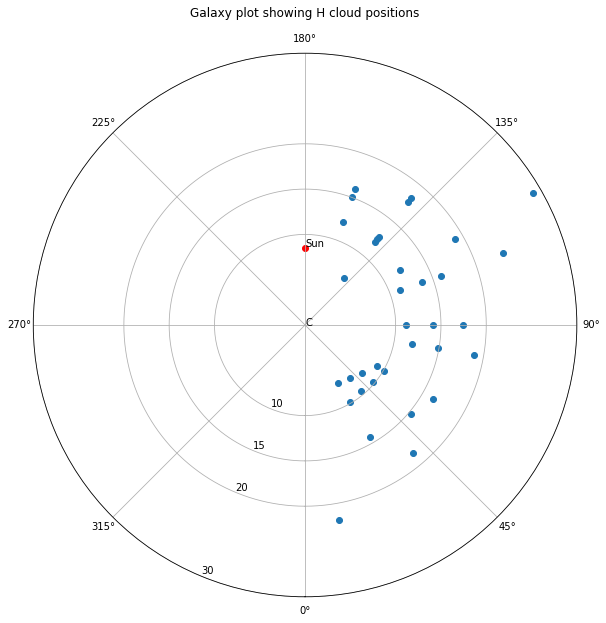

In [8]:
cloud_thetas = clouds_df['longitude']*3.142/180
cloud_r = clouds_df['R']

fig=plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='polar')
ax.scatter(cloud_thetas, cloud_r)
ax.scatter(np.deg2rad(180),8.5, marker = 'o', color='r')
ax.set_rmax(30)
ax.set_rticks([10, 15, 20, 30])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.annotate('Sun', xy=(np.deg2rad(180), 8.6))
ax.annotate('C', xy=(0,0.1))
ax.set_theta_zero_location('S')
ax.set_title("Galaxy plot showing H cloud positions", va='bottom')
plt.show()